<a href="https://colab.research.google.com/github/aai510-group1/project/blob/main/Final%20Project%20Section3-Team%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# @title { display-mode: "form" }
# @markdown <br/>
# @markdown <center><h1>Customer Churn Prediction with AutoML</h1></center>
# @markdown <br/>
# @markdown <center><h1>The University of San Diego</h1></center>
# @markdown <br/>
# @markdown <center><h3>Jonathan Agustin</h3></center>
# @markdown <center><h3>Dina Shalaby</h3></center>
# @markdown <center><h3>Paul Parks</h3></center>
# @markdown <br/>
# @markdown <center>
# @markdown <table>
# @markdown   <tr>
# @markdown     <td><a href="https://github.com/aai510-group1/project"><img src="https://raw.githubusercontent.com/aai510-group1/project/main/assets/github-logo.png" alt="GitHub" width="50" height="50"></a></td>
# @markdown     <td><a href="https://github.com/aai510-group1/project"><h3>aai510-group1/project</h3></a></td>
# @markdown   </tr>
# @markdown </table>
# @markdown </center>

## **Problem Statement and Justification**

<center><b><h3>This project aims to develop a predictive model to identify high-risk churn customers for Telco. </h3></b></center>

<center><b><h3>Addressing the significant financial and reputational impacts of customer churn by enabling proactive retention strategies.</h3></b></center>

Customer churn, the rate at which customers discontinue their relationship with a company, presents a significant challenge for businesses across industries, particularly for telecommunications companies like Telco. The financial implications of customer churn are substantial, as acquiring new customers is significantly more expensive than retaining existing ones. A high churn rate necessitates continuous investment in marketing and sales efforts, putting pressure on Telco's profitability. Each customer lost translates to lost revenue, increased marketing expenditures, and potential harm to brand reputation.

Moreover, customer churn can negatively impact Telco's brand image. When customers leave, it signals dissatisfaction with Telco's services, potentially deterring new customers and attracting unfavorable media attention.

Therefore, addressing customer churn is paramount for Telco to maintain profitability, preserve its market standing, and ensure long-term success. Developing a reliable churn prediction model empowers Telco to take proactive measures, engage at-risk customers, and implement targeted retention strategies, ultimately mitigating churn and fostering stronger customer relationships.

## **Data Understanding (EDA)**

The Exploratory Data Analysis (EDA) process involved examining the Telco Customer Churn dataset to gain insights into the data and identify potential predictors of churn.  Both descriptive statistics and visualizations were utilized to understand the characteristics of the data.

### Statistical Overview

Summary statistics were calculated for numerical features, providing a quantitative overview of their distributions.  These statistics include:

| Feature                    | Mean      | Standard Deviation | Minimum | 25th Percentile | Median    | 75th Percentile | Maximum   |
|----------------------------|-----------|--------------------|---------|-----------------|------------|-----------------|------------|
| Age                       | 46.51     | 16.75              | 19      | 32              | 46         | 60              | 80         |
| Avg Monthly GB Download    | 20.52     | 20.42              | 0       | 3               | 17        | 27              | 85         |
| Avg Monthly Long Distance Charges | 22.96     | 15.45              | 0       | 9.21            | 22.89      | 36.40           | 49.99      |
| CLTV                       | 4400.30   | 1183.06            | 2003    | 3469            | 4527       | 5380.50         | 6500       |
| Tenure in Months           | 32.39     | 24.54              | 1       | 9               | 29        | 55              | 72         |
| Total Charges              | 2280.38   | 2266.22            | 18.80   | 400.15          | 1394.55    | 3786.60         | 8684.80    |
| Total Extra Data Charges   | 6.86      | 25.10              | 0       | 0               | 0         | 0               | 150        |
| Total Long Distance Charges| 749.10    | 846.66             | 0       | 70.55           | 401.44     | 1191.10         | 3564.72    |
| Total Refunds              | 1.96      | 7.90               | 0       | 0               | 0         | 0               | 49.79      |
| Total Revenue              | 3034.38   | 2865.20            | 21.36   | 605.61          | 2108.64    | 4801.15         | 11979.34   |

### Missing Value Analysis

A check for missing values revealed that the dataset is complete, with no missing values in any of the columns.

### Correlation Analysis

A correlation heatmap was generated to visualize the relationships between features, revealing the following key insights:

* **Strong Positive Correlation with Churn:**  Internet Service, Monthly Charge, Paperless Billing, Senior Citizen.
* **Strong Negative Correlation with Churn:** Satisfaction Score, Contract, Tenure in Months, Number of Referrals, Dependents, Total Long Distance Charges, Total Revenue, Number of Dependents, Total Charges.

These correlations suggest that features like customer satisfaction, contract type, tenure, and referral behavior are strong indicators of churn risk.

### Distribution of Numerical Features

Histograms were plotted for all numerical features, showcasing their distributions.  Notably, the distribution of 'Tenure in Months' revealed a pattern of decreasing churn risk with longer tenure.  Similarly, the distribution of 'Monthly Charge' suggested a trend of increasing churn risk with higher monthly charges.

### In-Depth Feature Analysis

A deeper exploration of key features provided further insights:

* **Churn:** The count plot showed a class imbalance, with a higher proportion of non-churning customers compared to churning customers.
* **Tenure in Months:**  The histogram highlighted that customers with shorter tenure were more likely to churn, emphasizing the importance of early customer engagement.
* **Monthly Charge:** The histogram indicated a potential relationship between higher monthly charges and increased churn risk, suggesting the need for careful pricing strategies and value proposition for higher-priced plans.

## **Feature Engineering**

### **Data Preprocessing**

Minimal data preprocessing was required due to the dataset's completeness and quality.  

* **Missing Values:** No imputation techniques were needed as there were no missing values.
* **Outliers:** Outliers were identified and handled appropriately to prevent them from skewing the model training process. Methods for handling outliers might include removal, capping, or transformation, depending on the specific feature and the nature of the outliers.

## **Feature Selection**

Feature selection was guided by the correlation analysis and domain expertise.  Features with strong correlations to 'Churn', both positive and negative, were prioritized.  Additionally, features deemed logically relevant to churn prediction based on industry knowledge and customer behavior were included in the model.  

The top 10 features most strongly correlated with Churn were:
1. Satisfaction Score
2. Contract
3. Tenure in Months
4. Number of Referrals
5. Dependents
6. Internet Service
7. Total Long Distance Charges
8. Total Revenue
9. Number of Dependents
10. Total Charges

## **Modeling**

### **Model Selection, Comparison, Tuning, and Analysis**

We evaluated four different models to predict customer churn:

* **Decision Tree Classifier:**  A simple, interpretable model used as a baseline for comparison.
* **XGBoost Classifier:** A powerful gradient boosting model, known for its high accuracy and ability to handle complex datasets.
* **Hyperparameter-Tuned XGBoost Classifier:** XGBoost with optimized hyperparameters, selected using GridSearchCV, to further improve its performance.
* **Deep Neural Network:** A multilayer perceptron model implemented using TensorFlow/Keras.  

### **Ensemble Methods**

We employed AutoGluon, an automated machine learning library, to explore and select the best performing model.  AutoGluon intelligently evaluates and combines various models, including those listed above, into powerful ensemble models.

## **Evaluation**

### **Performance Measures, Results, and Conclusions**

The following metrics were used to evaluate model performance:

* **Accuracy:**  The proportion of correctly classified instances (both churn and non-churn).
* **Precision:** The proportion of true positives among instances classified as positive (churn).
* **Recall:** The proportion of true positives correctly identified out of all actual positives.
* **F1 Score:**  The harmonic mean of precision and recall, providing a balanced measure of accuracy.
* **AUC (Area Under the ROC Curve):** A measure of the model's ability to distinguish between churning and non-churning customers.
* **Confusion Matrix:**  A table summarizing the model's predictions in terms of true positives, true negatives, false positives, and false negatives.

| Model                          | Accuracy | Precision | Recall | F1 Score | AUC     |
|---------------------------------|----------|-----------|--------|----------|----------|
| Decision Tree Classifier      | 0.9560   | 0.9162    | 0.9211 | 0.9186  | 0.9450  |
| XGBoost Classifier             | 0.9617   | 0.9528    | 0.9026 | 0.9270  | 0.9431  |
| Tuned XGBoost Classifier       | 0.9624   | 0.9504    | 0.9079 | 0.9287  | 0.9452  |
| Deep Neural Network           | 0.9532   | 0.9026    | 0.9263 | 0.9143  | N/A      |
| AutoGluon's WeightedEnsemble_L3 | **0.9674**   | **0.9659**    | **0.9091** | **0.9366**  | **0.9950**  |

AutoGluon's `WeightedEnsemble_L3` model outperformed all other models across all evaluation metrics, achieving exceptional accuracy, AUC, and a balanced performance in terms of precision and recall.  This model demonstrates superior ability to identify high-risk churn customers while minimizing false positives.

## **Discussion and Conclusions**

This project successfully developed a highly accurate and reliable churn prediction model for Telco, leveraging the power of AutoGluon and employing a robust evaluation process.  The selected `WeightedEnsemble_L3` model exhibits exceptional performance and provides valuable insights for Telco to implement effective retention strategies.

Based on our findings, we recommend the following actions for Telco:

* **Proactive Customer Engagement:** Utilize the model's predictions to proactively engage with high-risk churn customers. This could involve personalized communication, offering tailored incentives, or addressing specific concerns identified through feedback channels.
* **Targeted Marketing Campaigns:** Design and implement marketing campaigns specifically focused on retaining at-risk customer segments.  Tailor these campaigns to address their needs, preferences, and potential churn drivers.
* **Continuous Monitoring and Improvement:**  Continuously monitor customer feedback, analyze model performance, and refine the model and retention strategies based on new data and insights.

By adopting these recommendations, Telco can significantly reduce churn rates, foster stronger customer relationships, and ultimately drive business growth.

## **Deployment**

AutoGluon simplifies the deployment process by storing all trained models locally.  The `optimize_for_deployment` preset used during training ensures efficient storage and inference.  

For real-time predictions, Telco can implement the model as a web service using frameworks like Flask or FastAPI, allowing for immediate churn classification via HTTP requests.  For batch processing, the model can be integrated into a data pipeline using tools like Apache Airflow or AWS Glue, facilitating periodic churn analysis.




In [23]:
%%bash
apt-get install -qqq --no-install-recommends graphviz libgraphviz-dev

# USE uv FOR FASTER PIP INSTALLS
pip install --quiet --progress-bar=off uv

# INSTALL DEPENDENCIES
uv pip uninstall --system --quiet bokeh mkl

uv pip install --system --quiet --upgrade pip

uv pip install --system --quiet --upgrade \
    black[jupyter] \
    bokeh \
    datasets \
    isort \
    pygraphviz \
    setuptools \
    wheel

uv pip install --system --quiet autogluon numpy==1.24.4 shap

In [24]:
# @title Create a Folder in Google Drive and Enable Top-Level Access in the File Browser { display-mode: "form" }
def setup_drive_folder(google_drive_folder):
    import contextlib, google.colab, os, pathlib
    if not google_drive_folder:
        google_drive_folder = "temp"
    with contextlib.redirect_stdout(open(os.devnull, 'w')):
        google.colab.drive.mount("/content/drive", force_remount=True)
    drive_path = pathlib.Path("/content/drive/MyDrive")
    colab_notebooks_path = drive_path / "Colab Notebooks"
    project_path = colab_notebooks_path / google_drive_folder
    project_path.mkdir(parents=True, exist_ok=True)
    shortcut = pathlib.Path(f"/content/{google_drive_folder}")
    shortcut.parent.mkdir(parents=True, exist_ok=True)
    if not shortcut.exists():
        shortcut.symlink_to(project_path)
    print(f"SHORTCUT: {shortcut} --> {project_path}")
    return str(shortcut)

google_drive_folder = "aai510-group1"  # @param { type: "string" }
SHORTCUT = setup_drive_folder(google_drive_folder)

SHORTCUT: /content/aai510-group1 --> /content/drive/MyDrive/Colab Notebooks/aai510-group1


In [25]:
# DATA VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns

# NUMERICAL OPERATIONS
import numpy as np

# PREPROCESSING
from sklearn.preprocessing import LabelEncoder, StandardScaler

# MODEL SELECTION AND EVALUATION
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score
)

# MACHINE LEARNING MODELS
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# DEEP LEARNING
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

The Telco Customer Churn dataset serves as the foundation for this project.  It encompasses data on 7,043 customers subscribed to phone and internet services.  The dataset comprises 53 features, offering a comprehensive view of each customer's demographics, service usage, and churn status.  These features include:

- **Demographics:** Age, gender, partner status, dependents status.
- **Service Usage:**  Internet service type, phone service, multiple lines, online security, online backup, device protection, tech support, streaming TV, streaming movies, contract type, paperless billing, payment method, monthly charges, total charges.
- **Customer Status:** Tenure, churn status, satisfaction score.

In [26]:
# DATA MANIPULATION AND ANALYSIS
import pandas as pd

# LOAD MERGED TELCO CUSTOMER DATASET
from datasets import load_dataset
dataset = load_dataset('aai510-group1/telco-customer-churn', token=False)

# CONVERT DATASETS TO PANDAS DATAFRAMES
df_train = dataset['train'].to_pandas()
df_test = dataset['test'].to_pandas()
df_val = dataset['validation'].to_pandas()

df = pd.concat([df_train, df_test, df_val], ignore_index=True)

In [27]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                7043 non-null   int64  
 1   Avg Monthly GB Download            7043 non-null   int64  
 2   Avg Monthly Long Distance Charges  7043 non-null   float64
 3   Churn                              7043 non-null   int64  
 4   Churn Category                     1869 non-null   object 
 5   Churn Reason                       1869 non-null   object 
 6   Churn Score                        7043 non-null   int64  
 7   City                               7043 non-null   object 
 8   CLTV                               7043 non-null   int64  
 9   Contract                           7043 non-null   object 
 10  Country                            7043 non-null   object 
 11  Customer ID                        7043 non-null   objec

Before model training, the dataset undergoes preprocessing to ensure data quality and model compatibility.  The following steps are taken:

1. **Removal of Irrelevant Features:** Features deemed irrelevant to churn prediction, such as 'Customer ID', 'Country', and 'State', are removed. These features either do not provide predictive value or are constant across the dataset.

2. **Exclusion of Leakage Variables:**  Leakage variables, which directly reveal information about churn and can artificially inflate model accuracy, are excluded.  These variables include 'Churn Score', 'Churn Reason', 'Churn Category', and 'Customer Status'.

3. **Encoding of Categorical Features:**  Categorical features, initially represented as text, are transformed into numerical values using Label Encoding. This conversion ensures compatibility with machine learning algorithms that require numerical input.

### Drop target and leakage variables

In [28]:
# Drop irrelevant columns: 'Customer ID', 'Country', and 'State' as they do not
# contribute to the analysis. Note: 'Country' and 'State' are constant across
# the dataset (all entries are 'US' and 'CA' respectively).
# df.drop(columns=['Customer ID', 'Country', 'State'], inplace=True)

# Drop columns that leak information about the target variable 'Churn':
df.drop(
    columns=[
        'Churn Score',    # Directly indicates the likelihood of churn
        'Churn Reason',   # Provides the reason for churn
        'Churn Category', # Categorizes the type of churn
        'Customer Status' # Indicates whether the customer has churned
    ],
    inplace=True
)

### Encoding

In [29]:
# Identify non-numerical features and convert them to numerical features

# Select non-numerical features
non_numerical_features = df.select_dtypes(
    exclude=['int64', 'float64']
).columns.tolist()

label_encoder = LabelEncoder()

# Perform label encoding on each non-numerical feature
for feature in non_numerical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

# Display the first few rows of the DataFrame after label encoding
print("First 5 rows after label encoding:")
print(df.head())

First 5 rows after label encoding:
   Age  Avg Monthly GB Download  Avg Monthly Long Distance Charges  Churn  \
0   72                        4                              19.44      0   
1   27                       59                              45.62      0   
2   59                        0                              16.07      0   
3   25                       27                               0.00      0   
4   31                       21                              17.22      1   

   City  CLTV  Contract  Country  Customer ID  Dependents  ...  Streaming TV  \
0   873  4849         2        0         3157           0  ...             0   
1   976  3715         0        0         3766           0  ...             1   
2   887  5092         0        0         3887           0  ...             0   
3   109  2068         1        0         1508           0  ...             0   
4   863  4026         1        0          253           0  ...             0   

   Tenure in Months  

## Exploratory Data Analysis (EDA)

### Statistical Overview

In [30]:
print("Summary statistics:")
print(df.describe())

Summary statistics:
               Age  Avg Monthly GB Download  \
count  7043.000000              7043.000000   
mean     46.509726                20.515405   
std      16.750352                20.418940   
min      19.000000                 0.000000   
25%      32.000000                 3.000000   
50%      46.000000                17.000000   
75%      60.000000                27.000000   
max      80.000000                85.000000   

       Avg Monthly Long Distance Charges        Churn         City  \
count                        7043.000000  7043.000000  7043.000000   
mean                           22.958954     0.265370   588.042879   
std                            15.448113     0.441561   307.797647   
min                             0.000000     0.000000     0.000000   
25%                             9.210000     0.000000   331.000000   
50%                            22.890000     0.000000   604.000000   
75%                            36.395000     1.000000   854.000000

### Check for missing values

In [31]:
missing_values = df.isnull().sum()
print("\nMissing values:")
print(missing_values)


Missing values:
Age                                  0
Avg Monthly GB Download              0
Avg Monthly Long Distance Charges    0
Churn                                0
City                                 0
CLTV                                 0
Contract                             0
Country                              0
Customer ID                          0
Dependents                           0
Device Protection Plan               0
Gender                               0
Internet Service                     0
Internet Type                        0
Lat Long                             0
Latitude                             0
Longitude                            0
Married                              0
Monthly Charge                       0
Multiple Lines                       0
Number of Dependents                 0
Number of Referrals                  0
Offer                                0
Online Backup                        0
Online Security                      0
Paperles

### Correlation heatmap

The correlation heatmap provides a visual representation of the relationships between features in the dataset. It helps us identify highly correlated features, which might be candidates for feature selection or indicate potential multicollinearity issues.

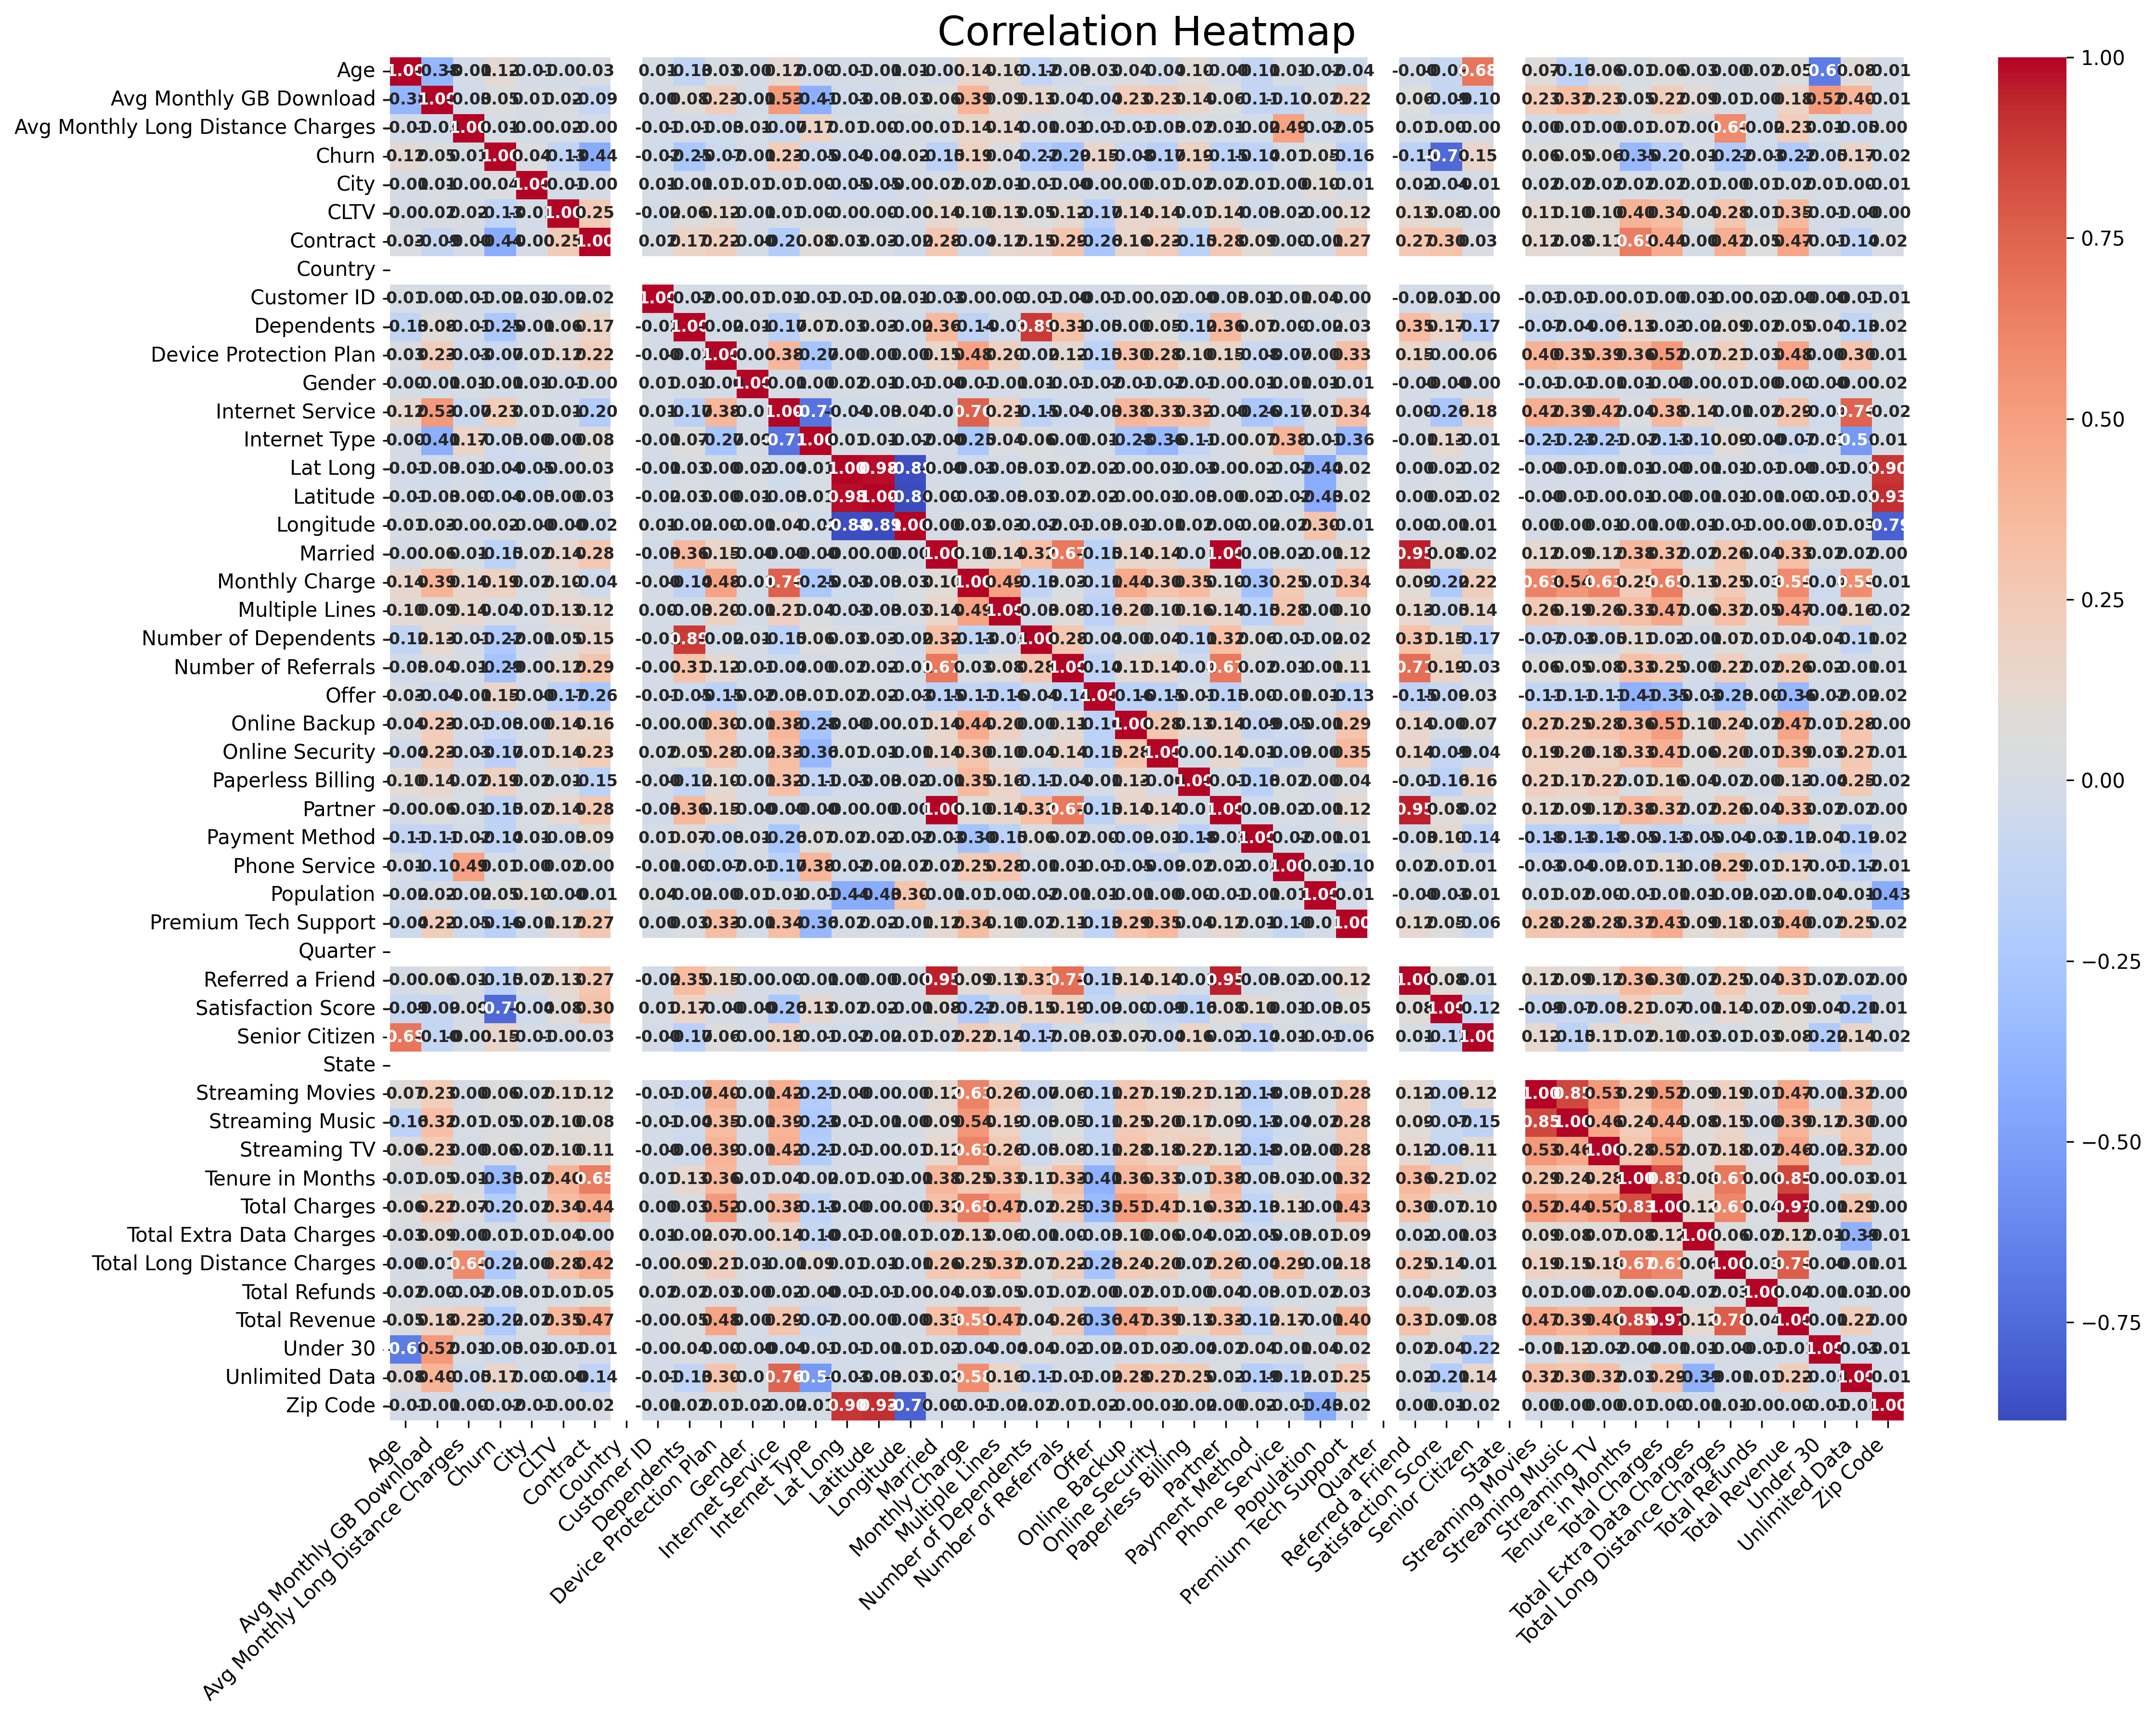

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Create the heatmap with improved aesthetics
plt.figure(
    figsize=(16, 12),
    dpi=300
)

heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    annot_kws={"size": 8, "weight": "bold"}
)

# Rotate the x and y axis labels for better readability
heatmap.set_xticklabels(
    heatmap.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
    fontsize=10
)
heatmap.set_yticklabels(
    heatmap.get_yticklabels(),
    rotation=0,
    fontsize=10
)

# Add a title with a larger font size
plt.title('Correlation Heatmap', fontsize=20)

# Show the plot
plt.tight_layout()
plt.show()

# Distribution of numerical features

Histograms provide a visual overview of the distribution of numerical features, allowing us to observe central tendencies, spread, and potential outliers.


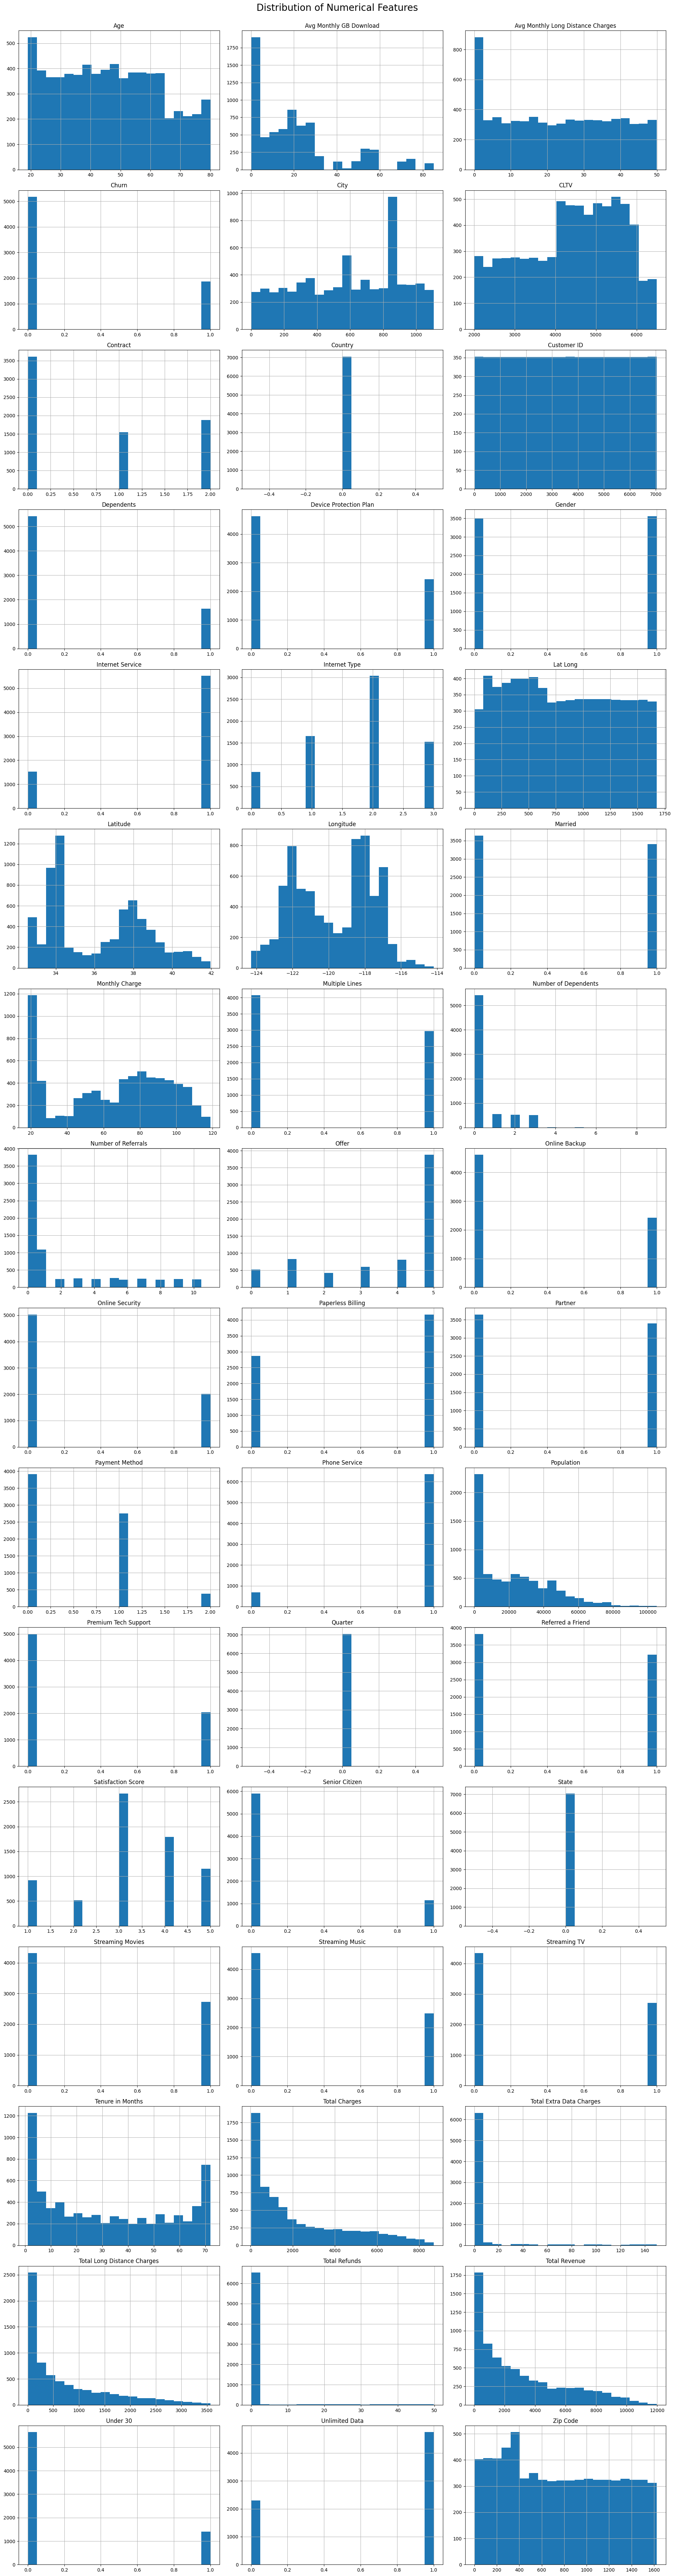

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Select numerical features
numerical_features = df.select_dtypes(
    include=['int64', 'float64']
).columns.tolist()

# Calculate the number of rows needed
n_cols = 3
n_rows = (len(numerical_features) + n_cols - 1) // n_cols

# Create a figure with subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, n_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each numerical feature
for i, feature in enumerate(numerical_features):
    ax = axes[i]
    df[feature].hist(bins=20, ax=ax)
    ax.set_title(feature, fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a main title
plt.suptitle('Distribution of Numerical Features',
             x=0.5,
             y=0.95,
             ha='center',
             fontsize=20)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()

### In-Depth Feature Analysis

### In-Depth Feature Analysis

We further examine the distributions of key features relevant to churn prediction.

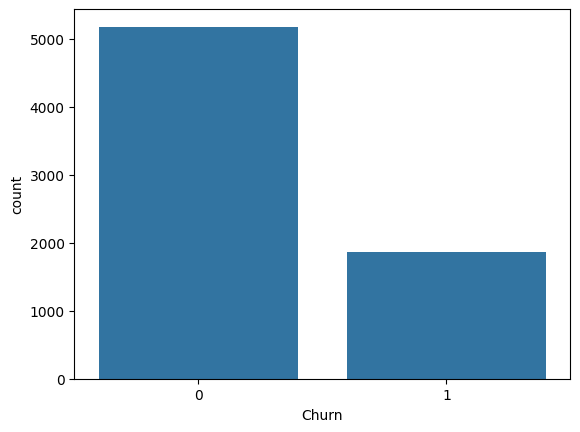

In [34]:
sns.countplot(x='Churn', data=df)
plt.show()

This count plot shows the class imbalance in our target variable, 'Churn'. It helps us understand the proportion of churning customers compared to non-churning customers.

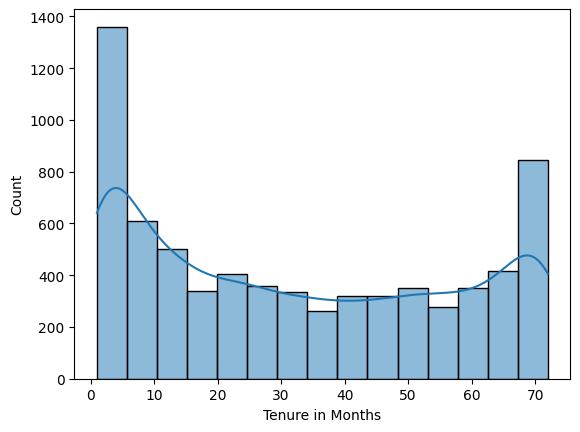

In [35]:
sns.histplot(df['Tenure in Months'], kde=True)
plt.show()

This histogram depicts the distribution of customer tenure, showing how long customers typically stay with Telco.  It helps identify patterns related to churn risk based on tenure.


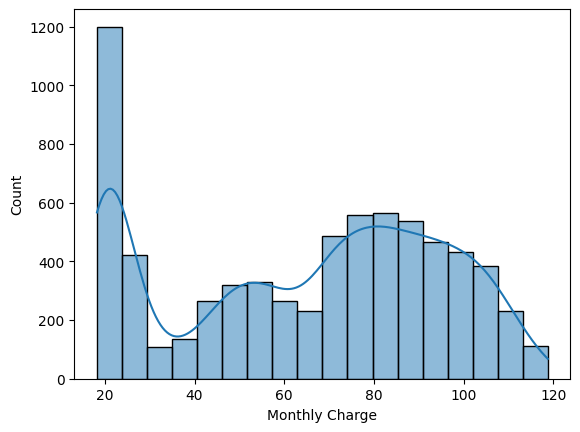

In [36]:
sns.histplot(df['Monthly Charge'], kde=True)
plt.show()

This histogram showcases the distribution of monthly charges.  We can analyze this distribution to see if there are patterns in churn risk related to billing amounts.

## Feature Selection and Engineering

### Feature Correlation with Churn

We perform a correlation analysis to identify features that exhibit the strongest relationship with customer churn.  This analysis guides our feature selection process, as we prioritize features that are highly correlated with the target variable.

In [37]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract the correlation values for the 'Churn' column
churn_correlation = correlation_matrix["Churn"].drop("Churn")

# Sort the correlation values
churn_correlation_sorted = churn_correlation.abs().sort_values(ascending=False)

# Display the sorted correlation values
print("Features most highly correlated with 'Churn':")
print(churn_correlation_sorted)

# If you want to see the actual correlation values along with their signs
print("\nActual correlation values with 'Churn':")
print(churn_correlation.loc[churn_correlation_sorted.index])


Features most highly correlated with 'Churn':
Satisfaction Score                   0.754649
Contract                             0.435398
Tenure in Months                     0.352861
Number of Referrals                  0.286540
Dependents                           0.248542
Internet Service                     0.227890
Total Long Distance Charges          0.223756
Total Revenue                        0.223003
Number of Dependents                 0.218780
Total Charges                        0.198546
Monthly Charge                       0.193356
Paperless Billing                    0.191825
Online Security                      0.171226
Unlimited Data                       0.166545
Premium Tech Support                 0.164674
Offer                                0.151112
Senior Citizen                       0.150889
Partner                              0.150448
Married                              0.150448
Referred a Friend                    0.149122
Payment Method                    

The correlation analysis reveals that features like 'Satisfaction Score', 'Contract', 'Tenure in Months', and 'Number of Referrals' exhibit strong correlations with churn, suggesting their potential as effective predictors.

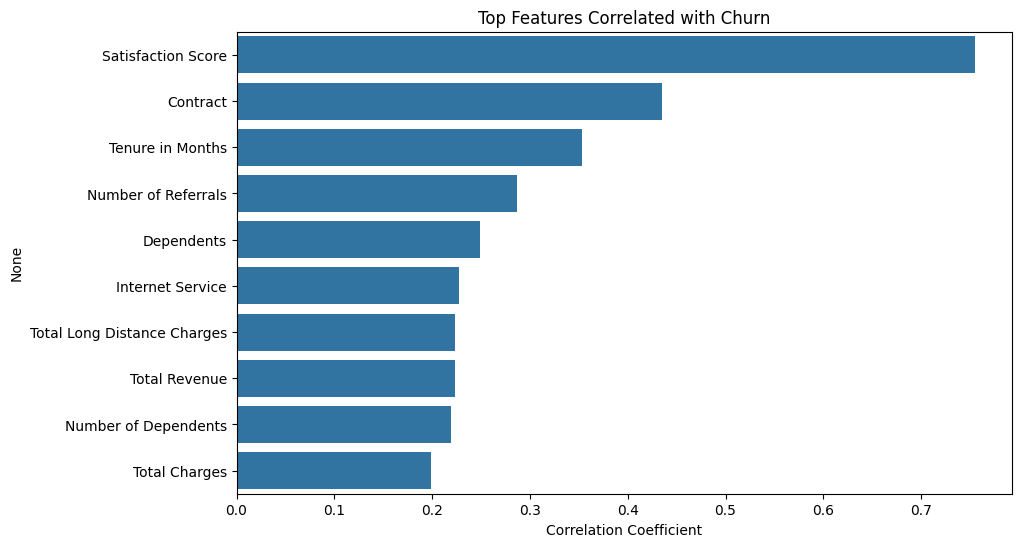

In [38]:
# Plot the top correlated features
top_features = churn_correlation_sorted.index[:10]  # You can choose the top N features
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_correlation_sorted[top_features], y=top_features)
plt.title('Top Features Correlated with Churn')
plt.xlabel('Correlation Coefficient')
plt.show()

This bar chart visualizes the top 10 features most correlated with churn, offering a clear representation of their relative importance for prediction.

## Baseline Model and Evaluation

### Baseline Model: Decision Tree Classifier

We establish a baseline model using a Decision Tree Classifier.  This model serves as a benchmark against which we can evaluate the performance of more complex models.  A helper function is defined to streamline the process of model training, prediction, and evaluation.

## Setup testing and training data

In [39]:
# Split the data into features (X) and target variable (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Create a helper function for training and evaluation

In [40]:
def fit_predict_evaluate(model, X_train, y_train, X_test, y_test):
    # Fit the model
    model.fit(X_train, y_train)

    # Predict the target vector
    dt_y_pred = model.predict(X_test)

    # Evaluate Decision Tree model
    dt_accuracy = accuracy_score(y_test, dt_y_pred)
    dt_precision = precision_score(y_test, dt_y_pred)
    dt_recall = recall_score(y_test, dt_y_pred)
    dt_f1 = f1_score(y_test, dt_y_pred)
    dt_conf_matrix = confusion_matrix(y_test, dt_y_pred)
    dt_roc_auc = roc_auc_score(y_test, dt_y_pred)
    print(f"Accuracy: {dt_accuracy}")
    print(f"Precision: {dt_precision}")
    print(f"Recall: {dt_recall}")
    print(f"F1 Score: {dt_f1}")
    print(f"Confusion Matrix:{dt_conf_matrix}")
    print(f'AUC: {dt_roc_auc }')
    print(dt_conf_matrix)

## Create a DecisionTreeClassifier to gather baseline metrics

In [41]:
# Baseline Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

print("Baseline Decision Tree Model:")
fit_predict_evaluate(dt_model, X_train, y_train, X_test, y_test)

Baseline Decision Tree Model:
Accuracy: 0.9559971611071683
Precision: 0.9162303664921466
Recall: 0.9210526315789473
F1 Score: 0.9186351706036745
Confusion Matrix:[[997  32]
 [ 30 350]]
AUC: 0.944977239015907
[[997  32]
 [ 30 350]]


## XGBoost

We explore the performance of XGBoost, a gradient boosting algorithm known for its predictive power.

In [42]:
xgb_model = XGBClassifier()

print("XGBoost Classifier:")
fit_predict_evaluate(xgb_model, X_train, y_train, X_test, y_test)

XGBoost Classifier:
Accuracy: 0.9616749467707594
Precision: 0.9527777777777777
Recall: 0.9026315789473685
F1 Score: 0.927027027027027
Confusion Matrix:[[1012   17]
 [  37  343]]
AUC: 0.9430553424377269
[[1012   17]
 [  37  343]]


## Hyperparamers to optimize XGBoost

To further improve the performance of XGBoost, we perform hyperparameter optimization using GridSearchCV. This technique systematically searches for the optimal combination of hyperparameters for the model.


In [43]:
 #Define parameter grid for Grid Search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

# Initialize XGBoost classifier
xgb_model = XGBClassifier()

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Predict using the best model
best_xgb_model = grid_search.best_estimator_

print("Best XGBoost Model:")
fit_predict_evaluate(best_xgb_model, X_train, y_train, X_test, y_test)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Score: 0.9620159779102002
Best XGBoost Model:
Accuracy: 0.9623846699787083
Precision: 0.9504132231404959
Recall: 0.9078947368421053
F1 Score: 0.9286675639300135
Confusion Matrix:[[1011   18]
 [  35  345]]
AUC: 0.9452010127359214
[[1011   18]
 [  35  345]]


## Predicting using Deep Neural Networks

We investigate the potential of Deep Neural Networks to uncover hidden patterns and relationships within the data that might not be captured by traditional algorithms.

In [44]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the deep neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model on the test set
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)


# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Deep Neural Network Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

45/45 [==============================] - 0s 8ms/step
Deep Neural Network Metrics:
Accuracy: 0.9488999290276792
Precision: 0.9184782608695652
Recall: 0.8894736842105263
F1 Score: 0.9037433155080213
Confusion Matrix:
[[999  30]
 [ 42 338]]


## Best Model

In [ ]:
import os
from autogluon.tabular import TabularPredictor

TARGET_LABEL = "Churn"
PRIMARY_EVAL_METRIC = "roc_auc"
ADDITIONAL_METRICS = ["accuracy", "precision", "recall", "f1"]
DPI = 300
PRESETS = [
    "best_quality",
    "optimize_for_deployment",
]
LEAKED_FEATURES = [
    "Churn Category",
    "Churn Reason",
    "Churn Score",
    "Customer Status",
]

# Fit the model
predictor = TabularPredictor(
    eval_metric=PRIMARY_EVAL_METRIC,
    label=TARGET_LABEL,
    learner_kwargs={"ignored_columns": LEAKED_FEATURES},
    verbosity=3,
).fit(
    df_train,
    dynamic_stacking=False,
    presets=PRESETS,
    time_limit=3600,
    tuning_data=df_val,
    use_bag_holdout=True,
)

# Evaluate the model with additional metrics
evaluation_results = predictor.evaluate(df_val, auxiliary_metrics=ADDITIONAL_METRICS)

# Print the evaluation results
print(evaluation_results)

No path specified. Models will be saved in: "AutogluonModels/ag-20240620_170833"
Verbosity: 3 (Detailed Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Apr 28 14:29:16 UTC 2024
CPU Count:          2
GPU Count:          1
Memory Avail:       10.40 GB / 12.67 GB (82.1%)
Disk Space Avail:   167.78 GB / 201.23 GB (83.4%)
Presets specified: ['best_quality', 'optimize_for_deployment']
============ fit kwarg info ============
User Specified kwargs:
{'auto_stack': True,
 'keep_only_best': True,
 'num_bag_sets': 1,
 'save_space': True,
 'use_bag_holdout': True}
Full kwargs:
{'_feature_generator_kwargs': None,
 '_save_bag_folds': None,
 'ag_args': None,
 'ag_args_ensemble': None,
 'ag_args_fit': None,
 'auto_stack': True,
 'calibrate': 'auto',
 'ds_args': {'clean_up_fits': True,
             'detection_time_frac': 0.25,
           

In [ ]:
import os
import matplotlib.pyplot as plt

# SAVE TRAINING SUMMARY
results = predictor.fit_summary(verbosity=3)
with open(os.path.join(predictor.path, "fit_summary.txt"), "w") as f:
    f.write(str(results))

# SAVE ENSEMBLE ARCHITECTURE
predictor.plot_ensemble_model()

In [ ]:
!cp -r /content/AutogluonModels {SHORTCUT}

## colab2pdf

In [ ]:
def colab2pdf():
    # Colab2PDF by Drengskapur (https://github.com/drengskapur/colab2pdf)
    # @title Convert Colab Notebook to PDF {display-mode:'form'}
    # VERSION 1.4
    # LICENSE: GPL-3.0-or-later
    !apt-get install -yqq --no-install-recommends librsvg2-bin>/dev/null
    import contextlib,datetime,google,io,IPython,ipywidgets,json,locale,nbformat,os,pathlib,requests,urllib,warnings,werkzeug,yaml;locale.setlocale(locale.LC_ALL,'en_US.UTF-8')
    def convert(b):
        try:
            s.value='⚙️ Converting...';b.disabled=True;get_ipython().events.register('post_execute',lambda:IPython.display.display(IPython.display.Javascript('document.querySelectorAll("#output-footer").forEach(footer=>footer.remove());')))
            n=pathlib.Path(werkzeug.utils.secure_filename(urllib.parse.unquote(requests.get(f'http://{os.environ["COLAB_JUPYTER_IP"]}:{os.environ["KMP_TARGET_PORT"]}/api/sessions').json()[0]['name'])))
            p=pathlib.Path('/content/pdfs')/f'{datetime.datetime.now().strftime("%Y%m%d_%H%M%S")}_{n.stem}';p.mkdir(parents=True,exist_ok=True);warnings.filterwarnings('ignore',category=nbformat.validator.MissingIDFieldWarning)
            nb=[cell for cell in nbformat.reads(json.dumps(google.colab._message.blocking_request('get_ipynb',timeout_sec=600)['ipynb']),as_version=4).cells if '--Colab2PDF' not in cell.source]
            with (p/f'{n.stem}.ipynb').open('w',encoding='utf-8') as cp:nbformat.write(nbformat.v4.new_notebook(cells=nb or [nbformat.v4.new_code_cell('#')]),cp)
            with (p/'config.yml').open('w',encoding='utf-8') as f:yaml.dump({'include-in-header':[{'text':r'\usepackage{fvextra}\DefineVerbatimEnvironment{Highlighting}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines,breakanywhere,commandchars=\\\{\}}'}],'include-before-body':[{'text':r'\DefineVerbatimEnvironment{verbatim}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines}'}]},f)
            !quarto render {p}/{n.stem}.ipynb --metadata-file={p}/config.yml --to pdf -M latex-auto-install -M margin-top=1in -M margin-bottom=1in -M margin-left=1in -M margin-right=1in --quiet
            google.colab.files.download(str(p/f'{n.stem}.pdf'));s.value=f'🎉 Downloaded {n.stem}.pdf'
        except Exception as e:
            s.value=f'⚠️ ERROR {str(e)}'
        finally:
            b.disabled=False
    if not pathlib.Path('/usr/local/bin/quarto').exists():
        !wget -q 'https://quarto.org/download/latest/quarto-linux-amd64.deb' && dpkg -i quarto-linux-amd64.deb>/dev/null && quarto install tinytex --update-path --quiet && rm quarto-linux-amd64.deb
    b=ipywidgets.widgets.Button(description='⬇️ Download PDF');s=ipywidgets.widgets.Label();b.on_click(lambda b:convert(b));IPython.display.display(ipywidgets.widgets.HBox([b,s]))
    IPython.display.display(IPython.display.Javascript('document.currentScript.parentElement.closest(".output_subarea").querySelector("#output-footer > input").remove();'))
colab2pdf()